In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Crie uma função que receba os seguintes argumentos:
#### - x, y : vetores com as coordenadas dos nós de interpolação
#### - grau (opcional): Grau do polinômio interpolador resultante
#### - func (opcional): função exata que o interpolador está aproximando
#### A função deve criar um polinômio interpolador utilizando os métodos prontos da biblioteca numpy e plotar o polinômio no intervalo definido pelo vetor x. No fim, retorne os coeficientes do polinômio interpolador. Se o parâmetro "grau" não for passado, utilize todos os pontos dos vetores x,y. Caso contrário, utilize a quantidade de pontos necessária para criar o polinômio interpolador, distribuindo da maneira mais uniforme possível. Se o parâmetro "func" for passado, plote a função exata no mesmo intervalo para comparar com o polinômio gerado.

In [2]:
def interpola(x, y, grau = None, func = None):
    n = len(x) #Pegando a quantidade de nós de interpolação
    if grau == None: #Se o parâmetro "grau" não for passado, utilize todos os pontos dos vetores x, y
        grau = n-1 #n+1 pontos -> grau n
    i = np.linspace(0, n-1, grau+1).astype(np.int) #utilize a quantidade de pontos necessária para criar o polinômio interpolador, distribuindo da maneira mais uniforme possível
    xi = x[i]
    yi = y[i]
    
    coef = np.polyfit(xi, yi, grau)  #A função deve criar um polinômio interpolador utilizando os métodos prontos da biblioteca numpy 
    
    pts = np.linspace(x[0], x[-1], 100) #100 pontos no intervalo definido pelo vetor x
    if func != None: #Se o parâmetro "func" for passado, plote a função exata no mesmo intervalo para comparar com o polinômio gerado
        plt.plot(pts, func(pts), '-')
    plt.plot(x, y, 'o') #todos os pontos
    plt.plot(pts, np.polyval(coef, pts)) #A função deve plotar o polinômio no intervalo definido pelo vetor x
    plt.plot(xi, yi, 'ro') #pontos utilizados
    plt.legend(['Função exata', 'Pontos dados', 'Polinômio interpolador', 'Pontos utilizados'])
    plt.title('Polinômio de grau %d' % grau)
    
    return coef #No fim, retorne os coeficientes do polinômio interpolador

## 2) Utilize a função anterior para plotar o crescimento diário de casos de covid-19 baseado no site: https://coronavirus.jhu.edu/map.html
#### Nesse site, você deve selecionar o País (lado esquerdo) e observar os dados do gráfico "Daily Increase" (canto direito). Seus objetivos serão:
#### a) Considerando os dados da Itália dos dias 6/3 a 16/3, use polinômios de graus 5,6,7,8 para estimar qual valor seria uma boa aproximação para o dado que está faltando no dia 11/3. Compare os valores para cada polinômio, e faça um gráfico com os dados discretos e as curvas resultantes dos seus polinômios.

In [3]:
#Itália
#Como estamos prevendo os casos para o dia 11/03, tem que tirar o seu dia/casos pra não ser considerado (considereando ele como um dado faltande)
dias = np.array([0, 1, 2, 3, 4, 6, 7, 8, 9, 10]) #Dias: 6/03 -> 16/03 (desconsiderando o dia 11/03)
casos = np.array([1200, 1500, 1800, 977, 2300, 5200, 3500, 3600, 3200, 3500], dtype = np.float) #Incremento diario de casos confirmados

Dia 11/03: 3981


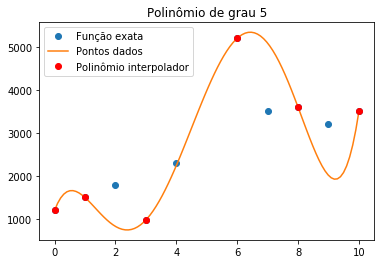

In [4]:
print('Dia 11/03: %d' % np.polyval(interpola(dias, casos, 5), 5))

Dia 11/03: 3435


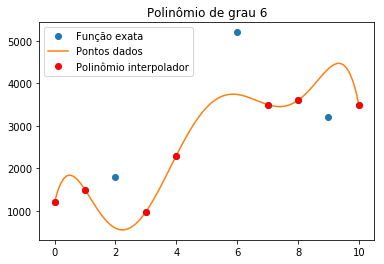

In [5]:
print('Dia 11/03: %d' % np.polyval(interpola(dias, casos, 6), 5))

Dia 11/03: 4509


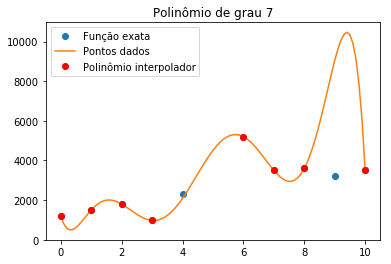

In [6]:
print('Dia 11/03: %d' % np.polyval(interpola(dias, casos, 7), 5))

Dia 11/03: 4726


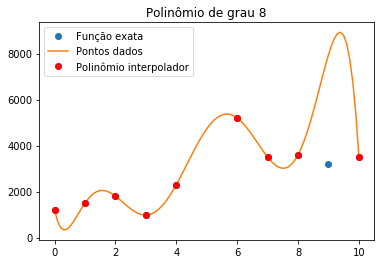

In [7]:
print('Dia 11/03: %d' % np.polyval(interpola(dias, casos, 8), 5))

#### R: Para o dia 11/03 polinômio de grau 5 apresentou 3981 casos; de grau 6, 3435 casos; de grau 7, 4509 casos; e de grau 8, 4726 casos.

#### b) Considerando os dados do EUA, dos dias 18/3 a 28/3, use polinômios de graus 5,6,7,8 para estimar qual valor seria uma boa aproximação para o dia 24/3. Como nesse gráfico temos o valor para o dia 24/3 (~12k), veja qual dos teus polinômios foi o que gerou o melhor resultado (menor erro, valor mais próximo do que consta no gráfico).

In [8]:
#EUA
#Como estamos prevendo os casos para o dia 24/03, tem que tirar o seu dia/casos pra não ser considerado (considereando ele como um dado faltande)
dias = np.array([0, 1, 2, 3, 4, 5, 7, 8, 9, 10]) #Dias: 18/03 -> 28/03
casos = np.array([5900, 5400, 6400, 7800, 10600, 9900, 18100, 17800, 19800, 19400], dtype = np.float) #Incremento diario de casos confirmados

Dia 24/03: 11635


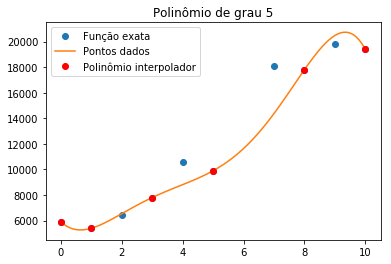

In [9]:
print('Dia 24/03: %d' % np.polyval(interpola(dias, casos, 5), 6))

Dia 24/03: 16675


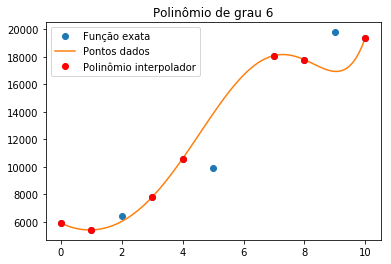

In [10]:
print('Dia 24/03: %d' % np.polyval(interpola(dias, casos, 6), 6))

Dia 24/03: 13695


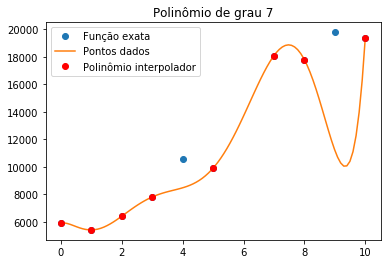

In [11]:
print('Dia 24/03: %d' % np.polyval(interpola(dias, casos, 7), 6))

Dia 24/03: 10143


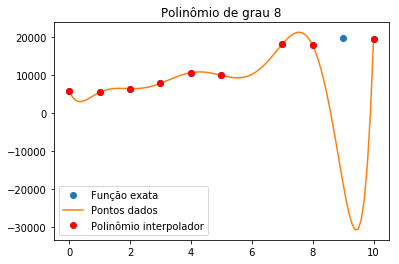

In [12]:
print('Dia 24/03: %d' % np.polyval(interpola(dias, casos, 8), 6))

#### R: O polinômio de grau 5 foi o que gerou o melhor resultado (11635).

## 3) Utilize a função criada no exercício 1 para criar polinômios interpoladores de graus 2, 3, 4, 6, 8 e 10  utilizando pontos igualmente espaçados para as funções:
#### a) f(x) = x^2 + sin(x) + cos(3x), -2 <= x <= 2

In [13]:
def f(x):
    return x**2 + np.sin(x) + np.cos(3*x)

array([-8.86487150e-03,  2.54331437e-06,  1.42649950e-01, -1.97787783e-04,
       -9.89456450e-01,  8.33258977e-03,  3.36501785e+00, -1.66666339e-01,
       -3.49891529e+00,  9.99999964e-01,  1.00000000e+00])

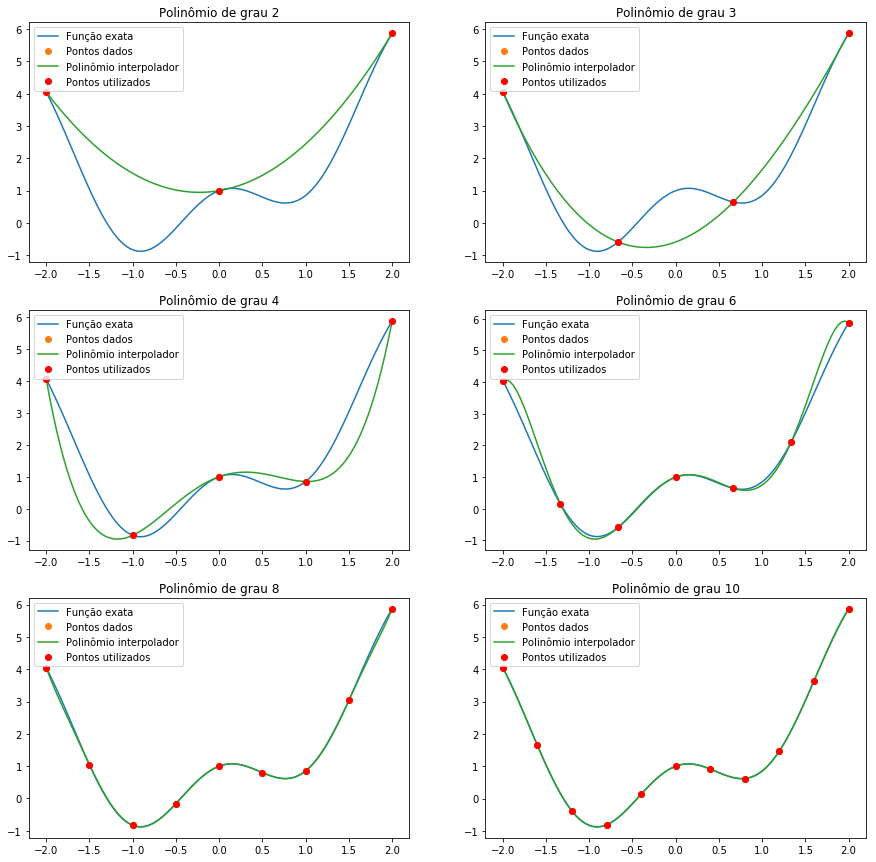

In [14]:
f_geral = plt.subplots(3,2)[0]
f_geral.set_figheight(15)
f_geral.set_figwidth(15)

plt.subplot(3,2,1)
x = np.linspace(-2, 2, 3)
y = f(x)
interpola(x, y, func = f)

plt.subplot(3,2,2)
x = np.linspace(-2, 2, 4)
y = f(x)
interpola(x, y,func = f)

plt.subplot(3,2,3)
x = np.linspace(-2, 2, 5)
y = f(x)
interpola(x, y, func = f)

plt.subplot(3,2,4)
x = np.linspace(-2, 2, 7)
y = f(x)
interpola(x, y, func = f)

plt.subplot(3,2,5)
x = np.linspace(-2, 2, 9)
y = f(x)
interpola(x, y, func = f)

plt.subplot(3,2,6)
x = np.linspace(-2, 2, 11)
y = f(x)
interpola(x, y, func = f)

#### b) g(x) = 1 / (1 + 25 x^2), -1 <= x <= 1

In [15]:
def g(x):
    return 1 / (1 + 25 * x**2)

array([-2.20941742e+02,  6.12369646e-13,  4.94909502e+02,  6.37338774e-14,
       -3.81433824e+02, -1.11639915e-12,  1.23359729e+02,  5.19561747e-13,
       -1.68552036e+01, -4.51448730e-14,  1.00000000e+00])

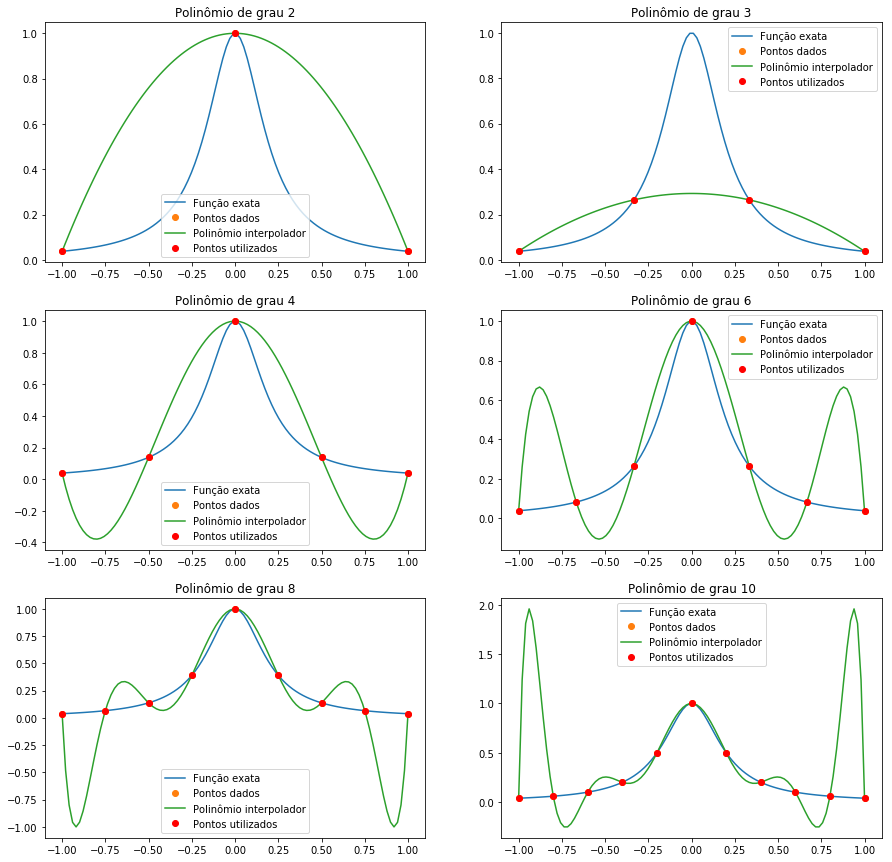

In [16]:
f_geral = plt.subplots(3,2)[0]
f_geral.set_figheight(15)
f_geral.set_figwidth(15)

plt.subplot(3,2,1)
x = np.linspace(-1, 1, 3)
y = g(x)
interpola(x, y, func = g)

plt.subplot(3,2,2)
x = np.linspace(-1, 1, 4)
y = g(x)
interpola(x, y, func = g)

plt.subplot(3,2,3)
x = np.linspace(-1, 1, 5)
y = g(x)
interpola(x, y, func = g)

plt.subplot(3,2,4)
x = np.linspace(-1, 1, 7)
y = g(x)
interpola(x, y, func = g)

plt.subplot(3,2,5)
x = np.linspace(-1, 1, 9)
y = g(x)
interpola(x, y, func = g)

plt.subplot(3,2,6)
x = np.linspace(-1, 1, 11)
y = g(x)
interpola(x, y, func = g)

### Uma observação a ser feita é que:
#### - para f(x), quando aumentamos o grau do polinômio interpolador, vemos que a estimativa de valores para os pontos que não foram utilizados para contruí-lo (qualquer valor entre os pontos vermelhos) é melhorada, uma vez que a linha verde (polinômio interpolador) se aproxima cada vez mais da linha azul (função exata).

#### - para g(x), quando aumentamos o grau do polinômio interpolador, vemos que a estimativa de valores para os pontos que não foram utilizados para construí-lo não é melhorada, pois, ao selecionar valores entre os pontos vermelhos, existe uma grande variação entre o valor real (dado pela função exata) e o valor estimado (dado pelo polinômio interpolador) quando o grau vai aumentando. Dessa forma, para uma melhor aproximação para essa função, os pontos selecionados não deveriam ser igualmente espaçados.

#### - Tendo em vista a métrica abaixo para cálculo do erro entre a função exata e o polinômio interpolador, podemos observar que, para f(x), quando o grau aumenta, o erro diminui. E, para g(x), quando aumenta o grau, o erro aumenta absurdamente. Isso acontece pois, o resultado do cálculo da n-ésima + 1 derivada retorna um valor muito grande, comparado ao valor correspondente de f(x). 
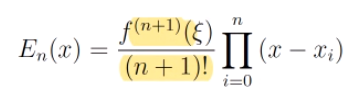